In [69]:
#Project One for COMP3800 (Data Analytics)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__author__ = 'Alex DeCesare'
__version__ = 'Fall 2022'

#Task One: Load and Describe the Data Set

data = pd.DataFrame(pd.read_csv('./ds_salaries.csv'))
print(data)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

Task One Describe the data set:

Link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

This is a dataset of job salaries for various data science jobs. This dataset is very detailed, as it includes the following variables, work year, experience level, employment type, job title, salary, employee residence, how much of the job is remote, company location, and company size. I intend to investiage the following three things:

1. How does the full time salary change with the job title, which job titles have the highest salaries and which have the lowest?

2. How does the salary for a full time job change with the experience level?

3. How does the salary change with the company size?

In [70]:
#Task Two Clean the Data

# EN = Entry Level, MI = Mid Level, SE = Senior Level
valid_values_for_experience_level = ['EN', 'MI', 'SE']
# S = Small Company, M = Medium Company, L = Large Company
valid_values_for_company_size = ['S', 'M', 'L']

# Filter by full time employees
salaries = data[data['employment_type'] == 'FT']
# Filter by United States currency only
salaries = salaries[salaries['salary_currency'] == 'USD']
# Filter by current year only
salaries = salaries[salaries['work_year'] == 2022]

salaries = salaries[['job_title', 'salary_in_usd', 'experience_level', 'company_size']]

# Drop nulls and duplicates
salaries = salaries.dropna()
salaries = salaries.drop_duplicates()

# Check data types
print('Data Types:')
print(salaries.dtypes)

# Change catagortical values to uppercase
salaries['job_title'] = salaries['job_title'].str.upper()
salaries['experience_level'] = salaries['experience_level'].str.upper()
salaries['company_size'] = salaries['company_size'].str.upper()

# Merge Executive Level and Senior Level
salaries['experience_level'] = salaries['experience_level'].replace('EX', 'SE')

# Remove incorrect inputs
salaries = salaries[salaries['experience_level'].isin(valid_values_for_experience_level)]
salaries = salaries[salaries['company_size'].isin(valid_values_for_company_size)]

# Remove outliers
salaries = salaries[salaries['salary_in_usd'] > 25000]
salaries = salaries[salaries['salary_in_usd'] < 1000000]

print('\nSalaries:')
print(salaries)

Data Types:
job_title           object
salary_in_usd        int64
experience_level    object
company_size        object
dtype: object

Salaries:
          job_title  salary_in_usd experience_level company_size
289   DATA ENGINEER         135000               SE            M
290    DATA ANALYST         155000               SE            M
291    DATA ANALYST         120600               SE            M
292  DATA SCIENTIST         130000               MI            M
293  DATA SCIENTIST          90000               MI            M
..              ...            ...              ...          ...
602   DATA ENGINEER         154000               SE            M
603   DATA ENGINEER         126000               SE            M
604    DATA ANALYST         129000               SE            M
605    DATA ANALYST         150000               SE            M
606    AI SCIENTIST         200000               MI            L

[192 rows x 4 columns]


<BarContainer object of 21 artists>

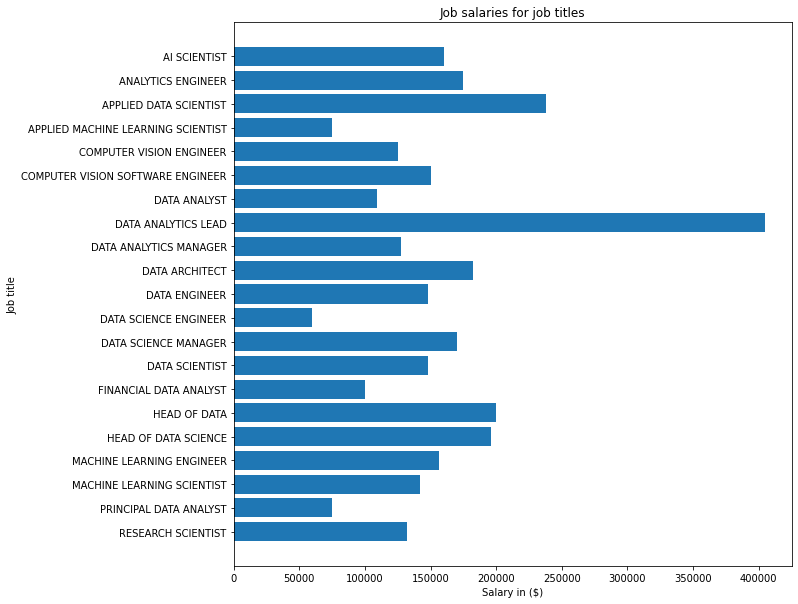

In [71]:
#Task Three Question A: Find how full time salary changes with the job title
salary_and_job_titles = salaries[['job_title', 'salary_in_usd']]
aggregated_salaries = salary_and_job_titles.groupby('job_title').aggregate(np.average).reset_index()
aggregated_salaries = aggregated_salaries.sort_index(ascending=False)

plt.figure(figsize=(10, 10))
plt.title('Job salaries for job titles')
plt.ylabel('Job title')
plt.xlabel('Salary in ($)')
plt.barh(aggregated_salaries['job_title'], aggregated_salaries['salary_in_usd'])

Task Three Question A

The data science job that has the highest salary is the Data Analytics Lead, followed by the Applied Data Scientist, and the Head of Data. The jobs with the lowest salaries are the Data Science Engineer, Applied Machine Learning Scientist, and Principal Data Analyst. 

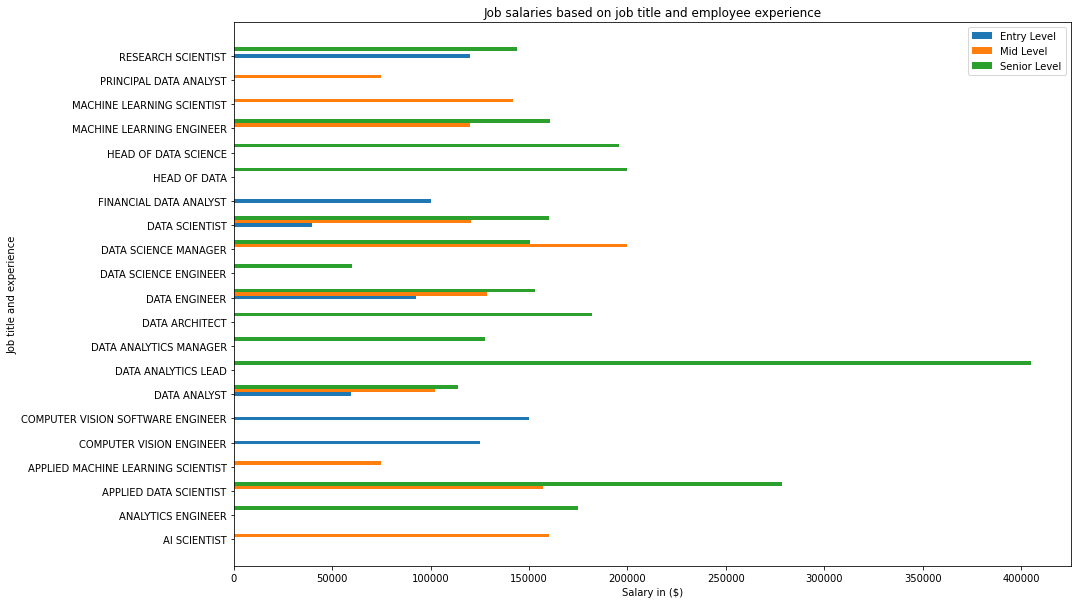

In [72]:
#Task Three Question B How does the salary for a full time job change with experience level

salary_job_titles_and_experience = salaries[['job_title', 'salary_in_usd', 'experience_level']]
job_titles = salary_job_titles_and_experience['job_title'].copy().drop_duplicates()
aggregated_salaries_by_job_title_and_experience = salary_job_titles_and_experience.groupby(['job_title', 'experience_level']).aggregate(np.average).reset_index()

# Fills in any missing values with a zero salary
for title in job_titles:
    salaries_for_job_title = aggregated_salaries_by_job_title_and_experience.where(aggregated_salaries_by_job_title_and_experience['job_title'] == title).dropna()
    for experience_level in valid_values_for_experience_level:
        if not salaries_for_job_title['experience_level'].isin([experience_level]).any():
            aggregated_salaries_by_job_title_and_experience.loc[len(aggregated_salaries_by_job_title_and_experience.index)] = [title, experience_level, 0]

#Gets salaries for respective experience levels
entry_level_salaries = aggregated_salaries_by_job_title_and_experience[aggregated_salaries_by_job_title_and_experience['experience_level'] == valid_values_for_experience_level[0]]
mid_level_salaries = aggregated_salaries_by_job_title_and_experience[aggregated_salaries_by_job_title_and_experience['experience_level'] == valid_values_for_experience_level[1]]
senior_level_salaries = aggregated_salaries_by_job_title_and_experience[aggregated_salaries_by_job_title_and_experience['experience_level'] == valid_values_for_experience_level[2]]

#Sorts the salaries for display
entry_level_salaries = entry_level_salaries.sort_values(by='job_title')
mid_level_salaries = mid_level_salaries.sort_values(by='job_title')
senior_level_salaries = senior_level_salaries.sort_values(by='job_title')
job_titles = job_titles.sort_values()

y_axis = np.arange(len(job_titles))
barWidth = .15

plt.figure(figsize=(15, 10))
plt.barh(y_axis, entry_level_salaries['salary_in_usd'], label='Entry Level', height=barWidth)
plt.barh(y_axis + barWidth, mid_level_salaries['salary_in_usd'], label='Mid Level', height=barWidth)
plt.barh(y_axis + barWidth * 2, senior_level_salaries['salary_in_usd'], label='Senior Level', height=barWidth)

plt.title('Job salaries based on job title and employee experience')
plt.ylabel('Job title and experience')
plt.xlabel('Salary in ($)')
plt.legend()
plt.yticks(y_axis, job_titles)
plt.show()

The salary changes mostly in step with the experience level, when the experience level increases the salary increases as well. Some job titles do not have anybody with a certain experience level working (i.e there are no entry level Heads of Data or Heads of Data Science). H An interesting thing this graph shows are the gaps between salary for each job title, the Data Analyst role is interesting as it has data for all experience levels and the gaps between salary between Entry and Mid level are quite large. However, between Mid Level and Senior Level, the gaps between salary are not very large. This may show limited upward career mobility for Data Analysts past the Mid Level experience. The Applied Data Scientist title is interesting as well, as the salary gap between Mid Level and Senior Level is quite large, possibly indicating that there is much upward mobility for Mid Level data engineers who hope to become Senior Level engineers.

This data also indicates the data science jobs with the highest salaries, which for entry level employees are Computer Vision Software Engineer, Computer Vision Engineer, and Research Scientist. For Mid Level employees some jobs are in management and some are still in engineering with the jobs with the highest salaries are Data Science Manager, Applied Data Scientist, and AI Scientists. For Senior Level employees the highest paying jobs are mostly in management, being the Data Analytics Lead, Applied Data Scientist, and Head of Data. Therefore, the graph also give an idea on the career progression for an engineer and shows that usually with experience that engineer will go into management.

  experience_level company_size  salary_in_usd
0               EN            L   86666.666667
3               MI            L  139883.333333
6               SE            L  182723.529412
1               EN            M   91000.000000
4               MI            M  127971.500000
7               SE            M  147253.289062
2               EN            S  107500.000000
5               MI            S   75250.000000
8               SE            S   92500.000000


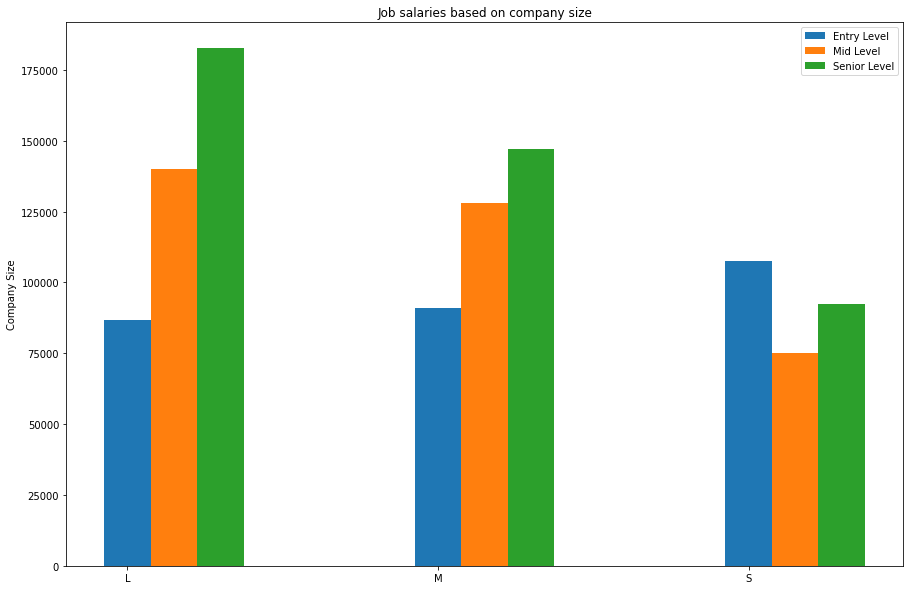

In [73]:
#Task Three Question C Find how the Salary Changes with Company Size
salaries_company_size_and_job_experience = salaries[['salary_in_usd', 'experience_level', 'company_size']]
aggregated_salaries_by_company_size_and_experience = salaries_company_size_and_job_experience.groupby(['experience_level', 'company_size']).aggregate(np.average).reset_index()
unique_company_sizes = aggregated_salaries_by_company_size_and_experience['company_size'].drop_duplicates()

x_axis = np.arange(len(unique_company_sizes))
width = .15

for company_size in valid_values_for_company_size:
    salaries_for_company_size = salaries_company_size_and_job_experience[salaries_company_size_and_job_experience['company_size'] == company_size]
    for level in valid_values_for_experience_level:
        if not salaries_for_company_size['experience_level'].isin([level]).any():
           aggregated_salaries_by_company_size_and_experience.loc[len(aggregated_salaries_by_company_size_and_experience.index)] = [level, company_size, 0] 

aggregated_salaries_by_company_size_and_experience = aggregated_salaries_by_company_size_and_experience.sort_values(by='company_size')
print(aggregated_salaries_by_company_size_and_experience)

plt.figure(figsize=(15, 10))
plt.bar(x_axis, aggregated_salaries_by_company_size_and_experience[aggregated_salaries_by_company_size_and_experience['experience_level'] == 'EN']['salary_in_usd'], width = width, label='Entry Level')
plt.bar(x_axis + width, aggregated_salaries_by_company_size_and_experience[aggregated_salaries_by_company_size_and_experience['experience_level'] == 'MI']['salary_in_usd'], width = width, label='Mid Level')
plt.bar(x_axis + width * 2, aggregated_salaries_by_company_size_and_experience[aggregated_salaries_by_company_size_and_experience['experience_level'] == 'SE']['salary_in_usd'], width = width, label='Senior Level')

plt.legend()
plt.title('Job salaries based on company size')
plt.ylabel('Salary in ($)')
plt.xlabel('Company Size')
plt.xticks(x_axis, unique_company_sizes)
plt.show()

Task Three Question C Find how the Salary Changes with Company Size:


The graph shows us that, except for entry level employees, the larger the company the more the pay, with medium sized companies paying more on average than small companies and large companies paying more on average than medium companies. The pay difference is between large, medium, and small companies is likely because the larger the company the more resources it has to attract talent, hence the higher pay. 

Although, generally in Large and Medium companies more experience brings more pay, entry level employees receive more pay at large companies than they do at medium companies. However, the interesting thing is that entry level employees receive the most pay at small companies. More interestingly, entry level employees at small companies receive more pay than the Mid level and Senior level employees. This can be because larger companies tend to be more mature and as such want more experienced workers, who might not have all the cutting edge skills but know older and legacy technogies well. However, smaller companies are ussually not very mature and have little old or legacy technologies, they will likely require workers with new and cutting edge skills, which entry level employees have and as such entry level employees are more valued at a small company.

Task Four Summary:

For a college graduate interested in working in Data Science it can be difficult to figure out what career path in Data Science offers the best opportunity. For this college graduate the best way to figure that out is through crunching data. The data indicates that for entry level employees the path with the most pay is starting at a small company and once they work to Mid Level experience it would be best (pay wise) to move into a large companay. The best entry level jobs paywise appear to be either Computer Vision Software Engineer, Computer Vision Engineer, or Research Scientist, as the data shows that they offer the most pay for entry level employees. However, there is no data for the salaries for mid and senior level Computer Vision Software Engineers and Computer Vision Engineers, but given the specialized and difficult nature of those jobs, it would be a fair assumption that they will be well paid. Once this college graduate attains enough experience to apply to any job, regardless of experience, they may consider the following jobs Data Analytics Lead, Applied Data Scientist, and Head of Data, as they offer the best pay when experience is not a consideration. Therefore, the findings of this project give college graduates interested in working in Data Science an understanding regarding, the size of the companies they should consider working for, the positions they should be applying for, and the future positions they should be working to attain, if their main goal is pay.

Firstly, I would like to include multiple years of data into this project. The dataset has data for since 2020. However, using multiple years of data will include too many job titles to realisticaly graph. Therefore, I would like to add additional parts to the project which narrow down on the most popular job titles and provide multiple years of data for those job titles.

Secondly, I would like to investigate why it is that entry level employees make more money at smaller companies than larger companies, and why mid and senior level employees make less money at smaller companies. I would be curious if the dataset includes alternative forms of pay (i.e stock options) that would be more popular with younger employees who want to take more risk, but unpopular with older employees who don't want to take on that risk. 

Task Five Github Repo:

https://github.com/alexofceaser85/ProjectOne